<a href="https://colab.research.google.com/github/farwest1/ml/blob/master/Book_2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:

from google.colab import files


uploaded = files.upload()




Saving housing.csv to housing.csv


In [0]:
import numpy as np

def split_train_test(data, test_ratio):
  ld = len(data)
  print("length of data: %s" %(ld))
  shuffled_indices = np.random.permutation(ld)
  test_set_size = int(ld * test_ratio)
  test_indices = shuffled_indices[:test_set_size]
  train_indices = shuffled_indices[test_set_size:]
  return data.iloc[train_indices], data.iloc[test_indices]



In [0]:
from zlib import crc32
import numpy as np

def test_set_check(identifier, test_ratio):
  return crc32(np.int64(identifier)) & 0xffffffff < test_ration * 2**32

# Data Analysis

Load the CSV data in a Pandas dataframe and start working on the data


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f28ab2dfb70>,
      dtype=object)

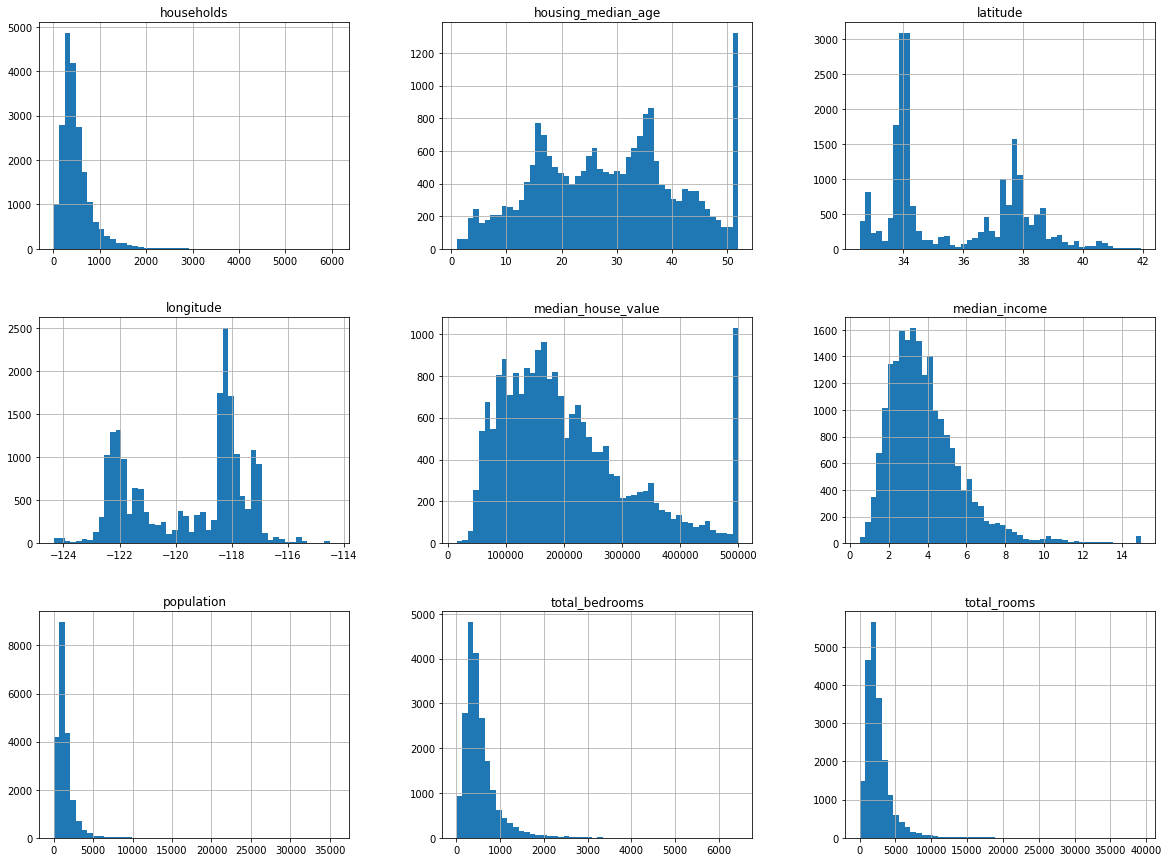

In [5]:
import pandas as pd
import io
%matplotlib inline
import matplotlib.pyplot as plt


housing = pd.read_csv(io.BytesIO(uploaded['housing.csv']))
# Display data if needed
housing.info()
housing["ocean_proximity"].value_counts()
housing.describe()
# housing
housing.hist(bins=50, figsize=(20,15))
#plt.show()

### Separate Training and Test set

Obviously this is not the best solution

In [0]:
split_train_test(housing, 0.2)

Categorize the income

... and drop it later



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
income_cat            20640 non-null category
dtypes: category(1), float64(9), object(1)
memory usage: 1.6+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float

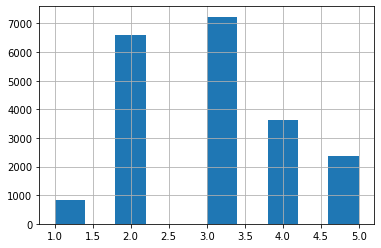

In [6]:
housing["income_cat"] = pd.cut(housing["median_income"], bins=[0.,1.5,3.,4.5,6.,np.inf],labels=[1,2,3,4,5])
housing.info()
housing["income_cat"].hist()
housing.drop("income_cat",axis=1,inplace=True)
housing.info()

Play around with some graphics


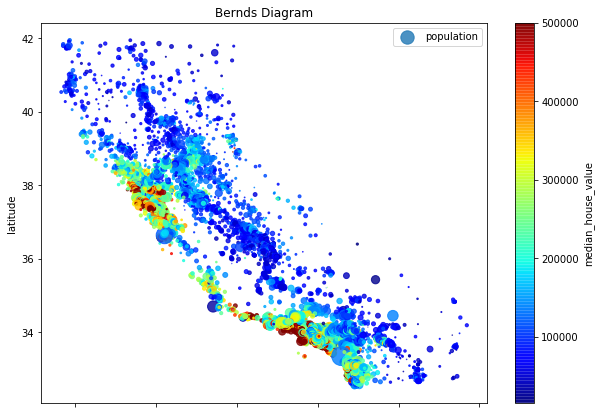

In [7]:
housing.plot(kind="scatter",x="longitude", y="latitude", title="Bernds Diagram", alpha=0.8,
             s=housing["population"]/100, label="population",figsize=(10,7),
             c="median_house_value", cmap=plt.get_cmap("jet"),colorbar=True
             )

Look for correlations

In [0]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)


Get some more insights on correlation

In [0]:
from pandas.plotting import scatter_matrix
attribs = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]

scatter_matrix(housing[attribs], figsize=(12,8))